<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/RandomForest/RandomForest_and_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [5]:
np.random.seed(42)
x, y = make_circles(n_samples=500, noise=0.35, random_state=42, factor=0.1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
x.shape

(500, 2)

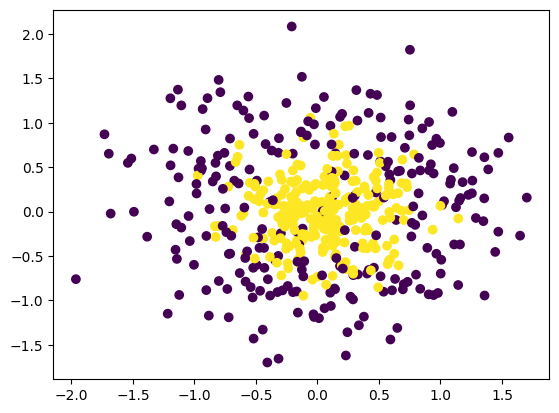

In [8]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

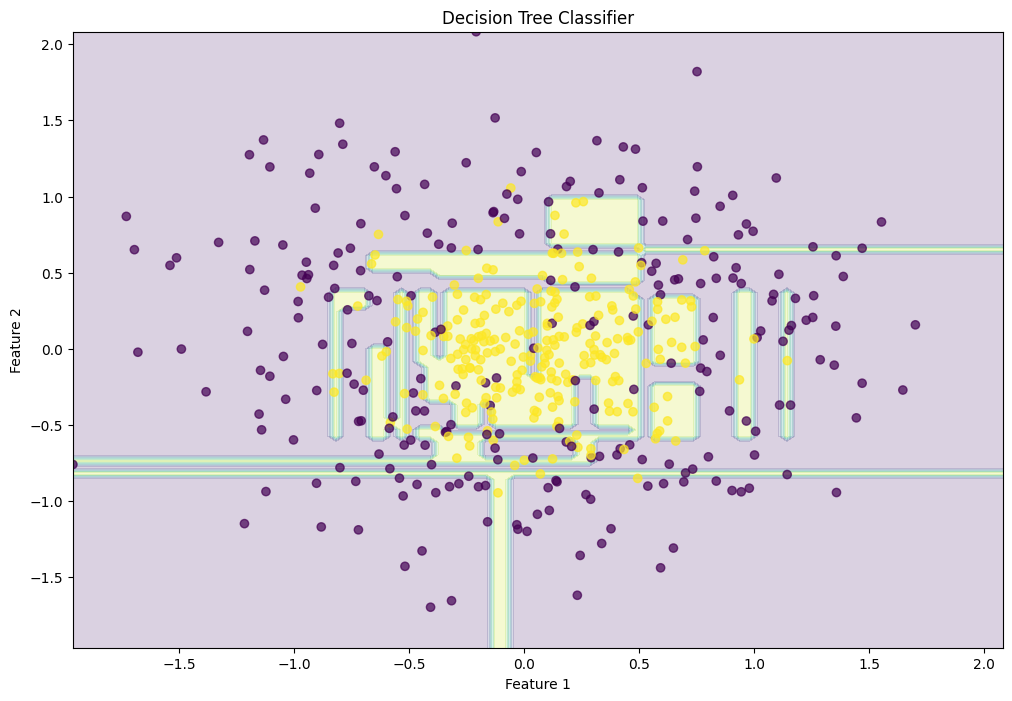

In [11]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(x.min(), x.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Tree Classifier")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

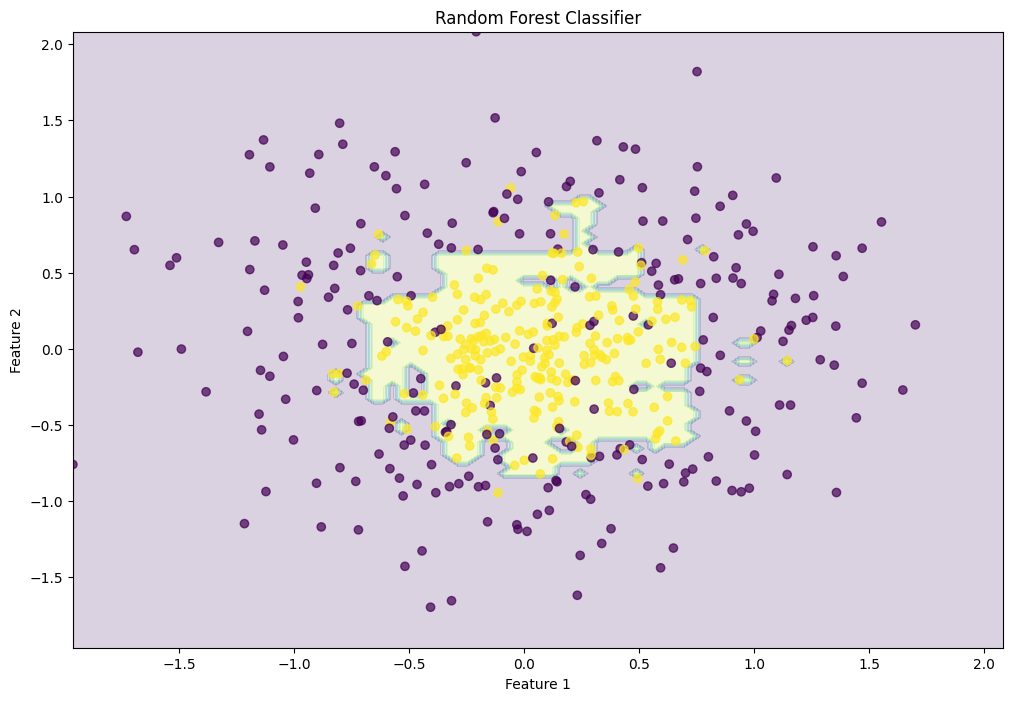

In [13]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(x_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(x.min(), x.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random Forest Classifier")
plt.show()

In [18]:
n_train = 150
n_test = 1000
noise = 0.1

# generate data
def f(x):
  x = x.ravel()
  return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
  X = np.random.rand(n_samples) * 10 - 5 #to generate n_samples random numbers in the range [-5, +5]
  X = np.sort(X).ravel() #to sort the values and flattens a multi dimensional array to 1D array
  y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + np.random.normal(0.0, noise, n_samples)
  # a bell curve centered at 0, a taller bell curve centered at 2, rest is gaussian noise
  X = X.reshape((n_samples, 1))

  return X, y

X_train, y_train = generate(n_samples = n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

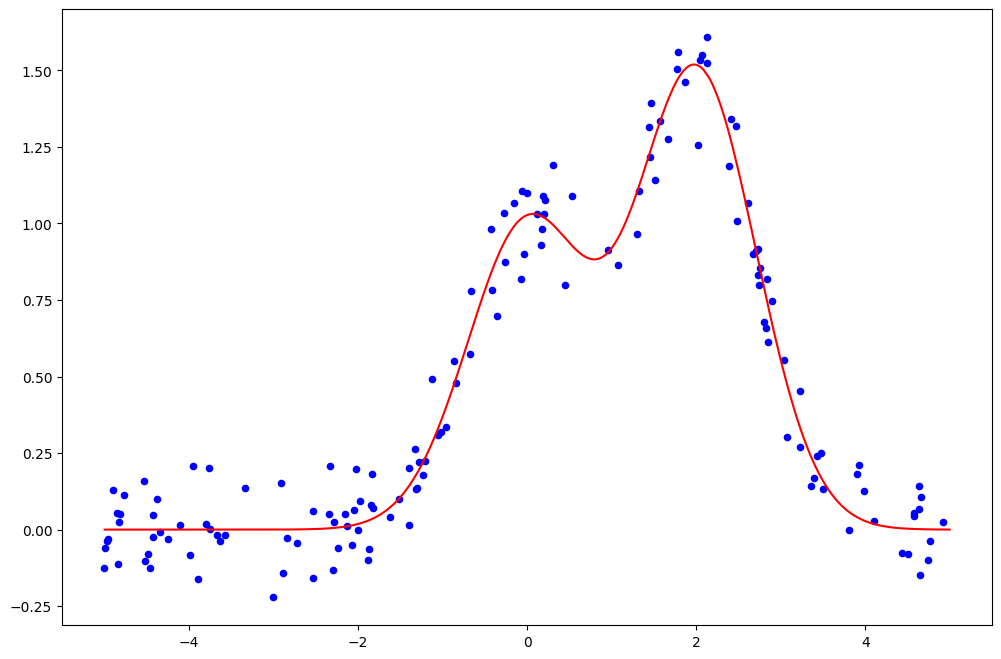

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)



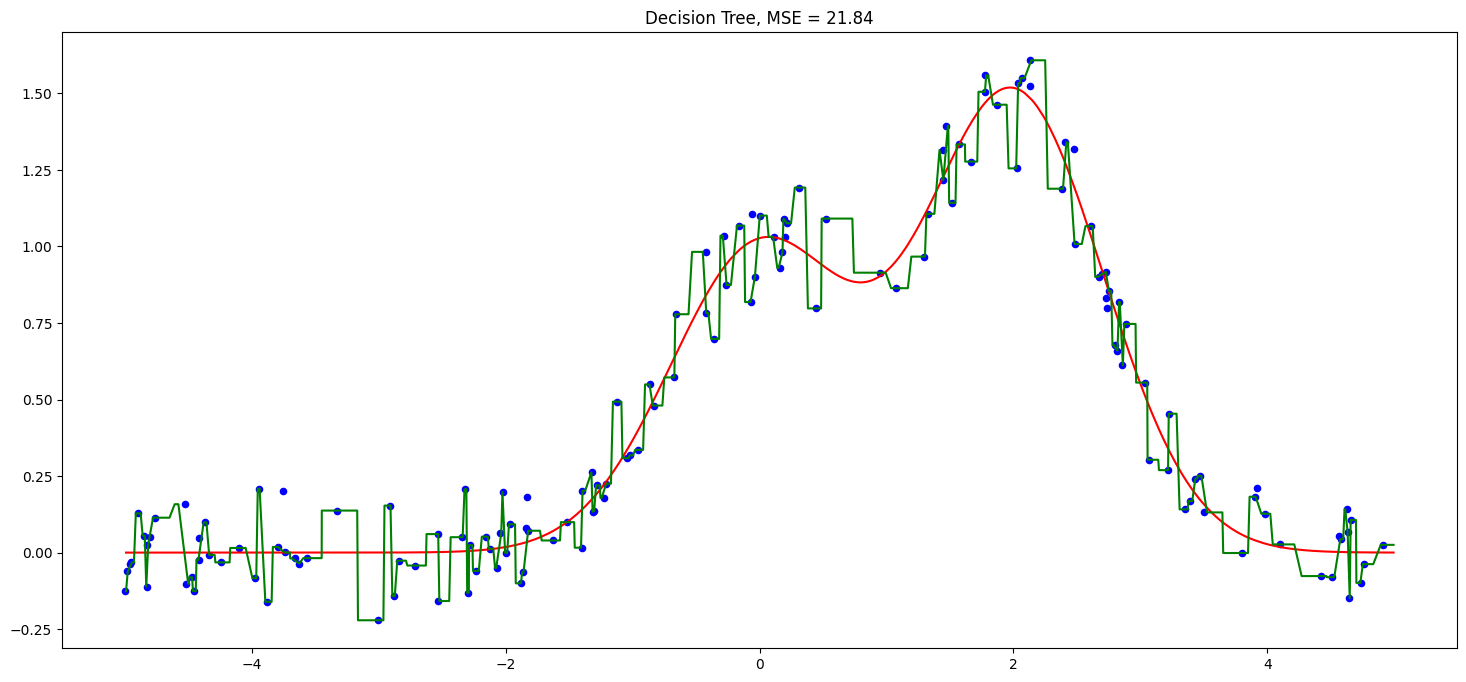

In [25]:
# One Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, dtree_predict, "g")
plt.title(f"Decision Tree, MSE = %.2f" %np.sum((y_test - dtree_predict) ** 2))
plt.show()

Random Forest

Text(0.5, 1.0, 'Random Forest, MSE = 14.62')

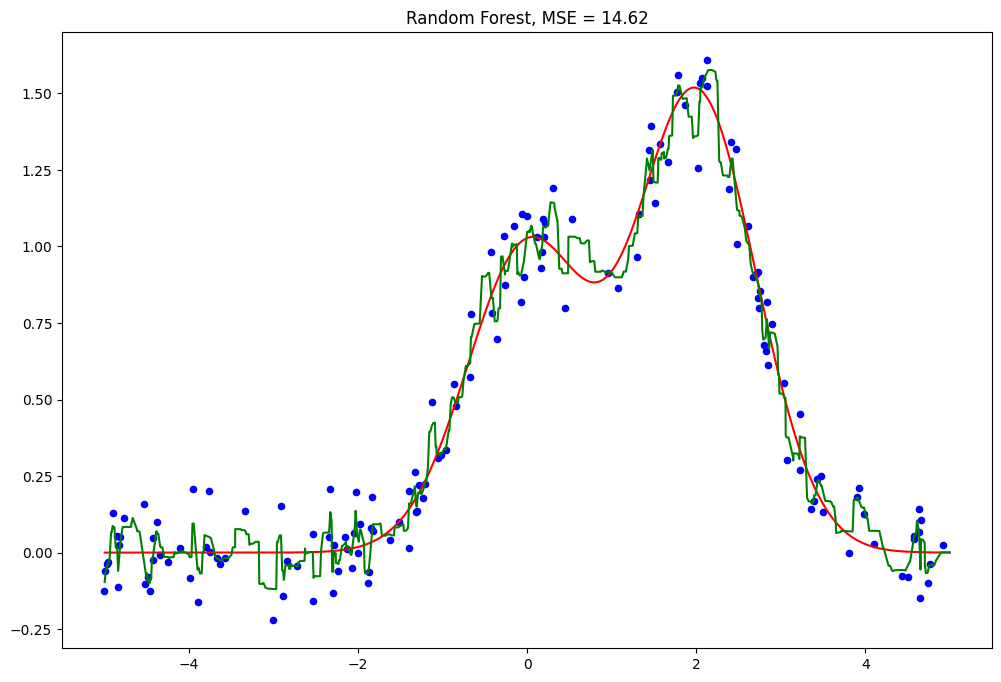

In [26]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rfr_predict = rfr.predict(X_test)

plt.figure(figsize=(12, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rfr_predict, "g")
plt.title(f"Random Forest, MSE = %.2f" % np.sum((y_test - rfr_predict) ** 2))